# iRODS-S3 Data Transfer

## Table of Contents
- [Introduction](#intro)
- [Performance Benchmarks](#performance)
- [Setting up S3](#config-s3)
- [Setting up iRODS](#config-irods)
- [Optional Scripts & Tools](#additional)

## <a name="intro"></a>Introduction
How to utilize an AWS S3 bucket thourgh iRODS: it also includes various time trial datapoints to give an idea of performance. (Presented as tables and graphs below). Testing was done with files ranging in size from ~60 MB to ~1GB. These trials ran the plugin iRODS has built. The plugin was set to cachless mode. (See _Using the S3 plugin in cacheless mode_ on [GitHub](https://github.com/irods/irods_resource_plugin_s3) for further details.)

## <a name="performance"></a>Performance benchmarks
The below are the six scenarios tested. They include upload and download into
- S3 directly through a UNIX system
- iRODS and into S3 via a plugin
- iRODS directly through a UNIX system

### File sizes:
- 1 GiB
- 613.1172 MiB
- 62.1896 MiB

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#File path to all csv files
csv_s3_down = "/data/S3-Download.csv"
csv_s3_up = "/data/S3-Upload.csv"
csv_s3_irods_down = "/data/irodsS3-Download.csv"
csv_s3_irods_up = "/data/irodsS3-Upload.csv"
csv_irods_down = "/data/irods-Download.csv"
csv_irods_up = "/data/irods-Upload.csv"

# Read all csv files into dataframes
df_s3_down = pd.read_csv(csv_s3_down)
df_s3_up = pd.read_csv(csv_s3_up)

df_s3_irods_down = pd.read_csv(csv_s3_irods_down)
df_s3_irods_up = pd.read_csv(csv_s3_irods_up)

df_irods_down = pd.read_csv(csv_irods_down)
df_irods_up = pd.read_csv(csv_irods_up)

### Download and upload into S3

In [6]:
# Display S3 download results
df_s3_down

,Duration (s),Throughput (MiB/s)
0,99.632,10.277822
1,89.771,11.406802
2,104.861,9.765308
3,90.815,11.275670
4,96.457,10.616129
5,95.540,10.718024
6,86.914,11.781761
7,102.334,10.006449
8,94.134,10.878110
9,97.986,10.450473


Text(0.5,1,'Download Throughput - S3 Only')

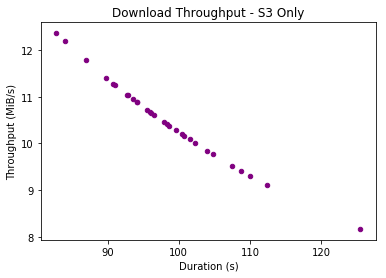

In [7]:
# Plot data
df_s3_down.plot.scatter(x=0,y=1,color='purple')
plt.title('Download Throughput - S3 Only')

In [85]:
df_s3_up

,Duration (s),Throughput (MiB/s)
0,23.486,43.600443
1,37.553,27.268128
2,24.552,41.707397
3,28.581,35.827998
4,29.499,34.713041
5,24.634,41.568564
6,24.091,42.505500
7,23.961,42.736113
8,30.327,33.765292
9,24.063,42.554960


Text(0.5,1,'Upload Throughput - S3 Only')

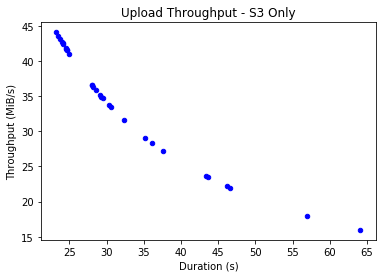

In [86]:
# Plot data
df_s3_up.plot.scatter(x=0,y=1,color='blue')
plt.title('Upload Throughput - S3 Only')

### Download & upload into S3 & iRODS using the plugin

In [8]:
df_s3_irods_down

,Duration (s),Throughput (MiB/s)
0,187.018,5.475
1,221.133,4.631
2,201.852,5.073
3,178.295,5.743
4,228.005,4.491
5,217.356,4.711
6,216.916,4.721
7,229.682,4.458
8,160.541,6.378
9,189.726,5.397


Text(0.5,1,'Download Throughput - S3 & iRODS')

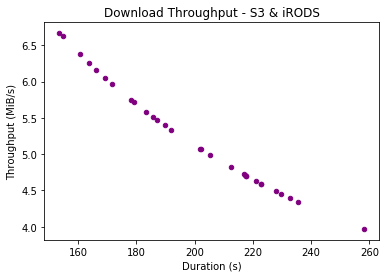

In [10]:
# Plot S3/iRODS data
df_s3_irods_down.plot.scatter(x=0,y=1,color='purple')
plt.title('Download Throughput - S3 & iRODS')

In [93]:
df_s3_irods_up

,Duration (s),Throughput (MiB/s)
0,33.867,30.236
1,42.933,23.851
2,41.932,24.420
3,33.622,30.456
4,46.335,22.100
5,46.454,22.043
6,42.649,24.010
7,36.538,28.026
8,40.813,25.090
9,52.956,19.337


Text(0.5,1,'Upload Throughput - S3 & iRODS')

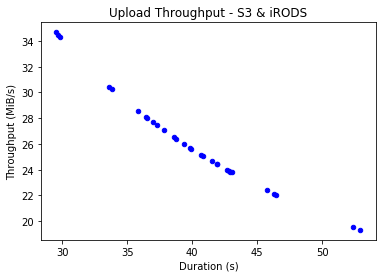

In [94]:
# Plot S3/iRODS data
df_s3_irods_up.plot.scatter(x=0,y=1,color='blue')
plt.title('Upload Throughput - S3 & iRODS')

### Download & upload into iRODS only

In [96]:
df_irods_down

,Duration (s),Throughput (MiB/s)
0,15.208,67.334
1,10.134,101.042
2,10.397,98.493
3,10.157,100.814
4,10.281,99.604
5,10.772,95.063
6,10.292,99.491
7,10.565,96.921
8,10.381,98.646
9,10.092,101.471


Text(0.5,1,'Download Throughput - iRODS Only')

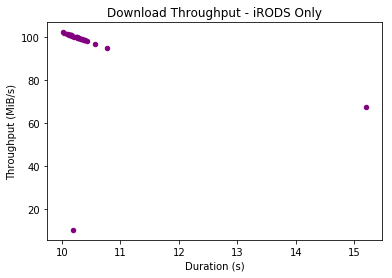

In [97]:
# Plot iRODS data
df_irods_down.plot.scatter(x=0,y=1,color='purple')
plt.title('Download Throughput - iRODS Only')

In [98]:
df_irods_up

,Duration (s),Throughput (MiB/s)
0,10.332,99.113
1,10.164,100.743
2,10.189,100.501
3,11.593,88.332
4,11.277,90.803
5,10.159,100.799
6,11.214,91.313
7,11.143,91.895
8,10.228,100.118
9,11.091,92.330


Text(0.5,1,'Upload Throughput - iRODS Only')

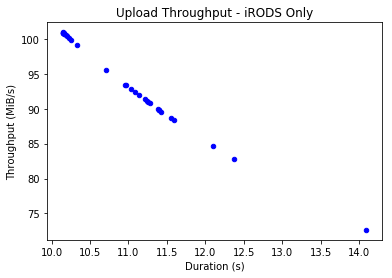

In [99]:
# Plot iRODS data
df_irods_up.plot.scatter(x=0,y=1,color='blue')
plt.title('Upload Throughput - iRODS Only')

As seen above, moving data in and out of S3 takes quite a long time. The length of time was not sigificantly changed when adding iRODS as an intermediary between moving data to S3.

## <a name="config-s3"></a>Setting up S3
This process requires you to have access to an S3 bucket for your testing. Take note of the name of your bucket and its region.

## <a name="config-irods"></a>Setting up iRODS with S3
The following pages will offer a framework for setting up your configuration. Note that it's necessary to 

- https://github.com/irods/irods_resource_plugin_s3
- https://irods.org/2019/09/irods-releases-cacheless-s3-resource-plugin/

## <a name="additional"></a>Optional Scripts & Tools
If you'd like to replicate or expand on the data in this notebook, you can use the script linked here:
https://github.com/cyverse/irods-adm/blob/master/cyverse-throughput

Note that in order to test the scenarios presented above (or to run additional ones) the `irods_environment.json` will need to be adjusted accordingly, adding and removing iRODS resoruces as necessary.

Testing performance with S3 alone can be made easier using the AWS CLI tools. https://aws.amazon.com/cli/